In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Abitazioni a Taiwan

**Si vuole calibrare un modello per il costo delle abitazioni a Taiwan**

<center>
<img src="assets/taiwan-tea-house.jpg" width="55%"/>
</center>

* Una dataset nel file `real_estate.csv`, nella cartella `data`
* Si tratta di dati pubblici dal [repository dell'Università della Californi, Irvine](https://archive.ics.uci.edu/ml/datasets.php)

## Esercizio: Abitazioni a Taiwan

**Si proceda al caricamento dei dati**

* Allo scopo, si utilizzi la funzione `example.analyze.read_csv`
* Si stampi quindi l'intestazione del file (nomi delle colonne)
* ...E le prime 5 righe della tabella

In [1]:
import os
from example import analyze

fname = os.path.join('data', 'real_estate.csv')
data, header = analyze.read_csv(fname)
print(header)
print(data[:5, :])

['house age', 'dist to MRT', '#stores', 'latitude', 'longitude', 'price per area']
[[1.4800000e+01 3.9326060e+02 6.0000000e+00 2.4961720e+01 1.2153812e+02
  7.6000000e+00]
 [1.7400000e+01 6.4880210e+03 1.0000000e+00 2.4957190e+01 1.2147353e+02
  1.1200000e+01]
 [1.6000000e+01 4.0665870e+03 0.0000000e+00 2.4942970e+01 1.2150342e+02
  1.1600000e+01]
 [3.0900000e+01 6.3962830e+03 1.0000000e+00 2.4943750e+01 1.2147883e+02
  1.2200000e+01]
 [1.6500000e+01 4.0820150e+03 0.0000000e+00 2.4941550e+01 1.2150381e+02
  1.2800000e+01]]


## Esercizio: Abitazioni a Taiwan

**Si osservino mediante grafici di dispersione le relazioni tra ingressi ed uscite**

Il dataset considerato ha più di una variabile di ingresso

* L'ultima colonna rappresenta l'uscita
* Le prime colonne rappresentano gli ingressi

Si consiglia di utilizzare un ciclo per iterare sulle prime colonne

* Ad ogni iterazione può essere costruito un grafico di dispersione

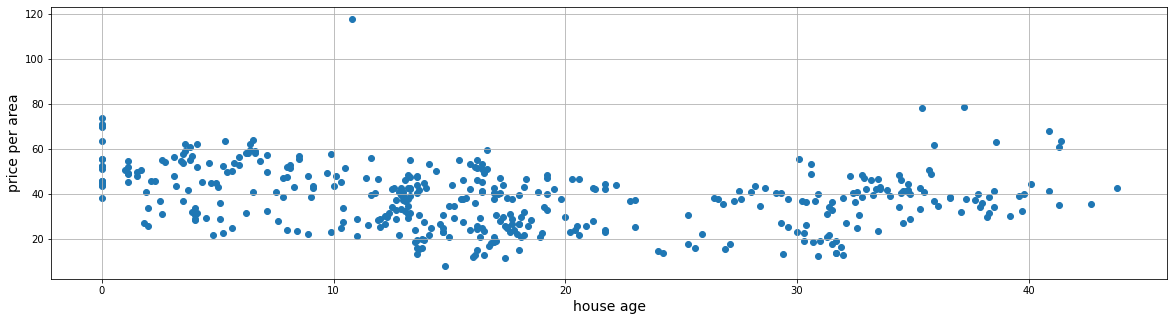

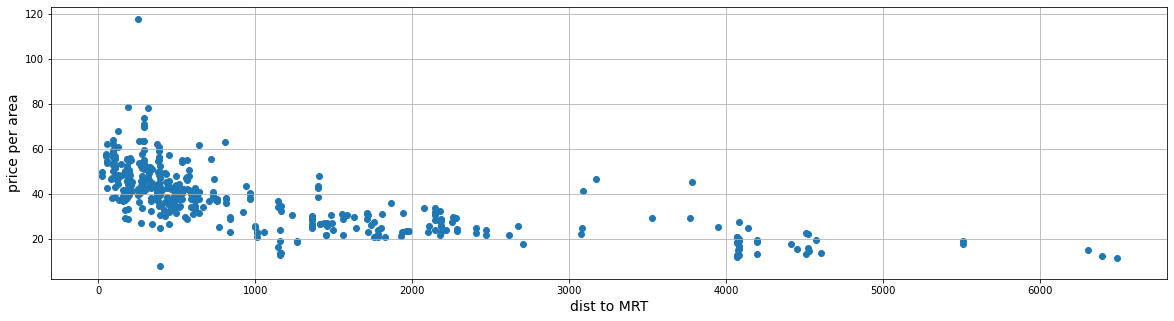

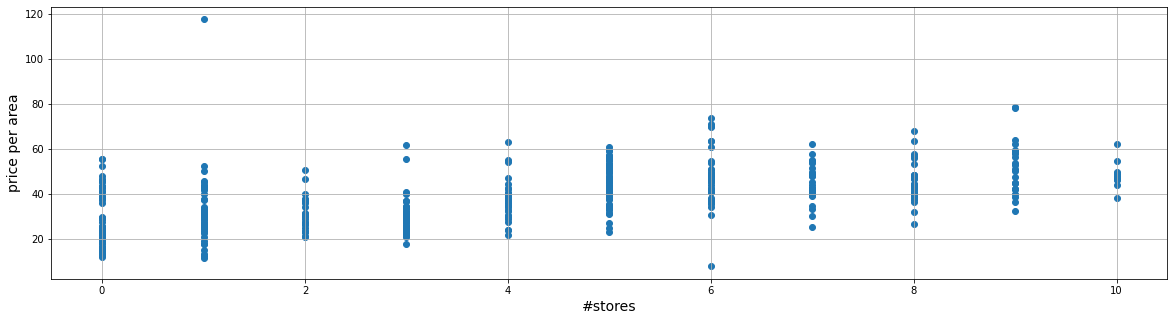

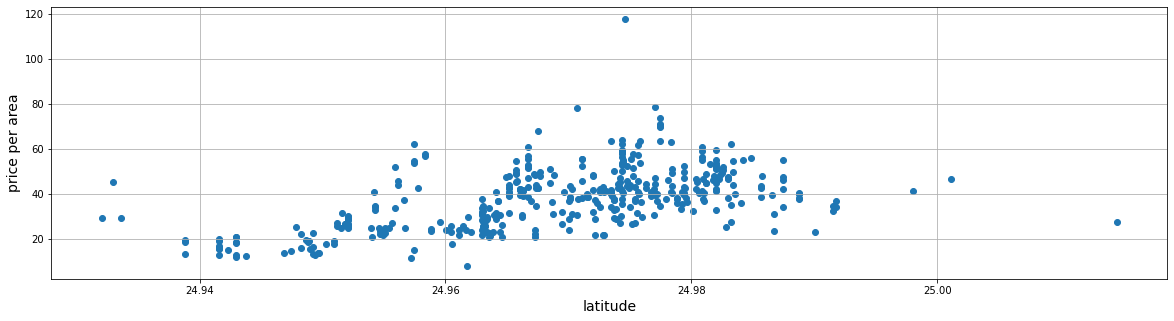

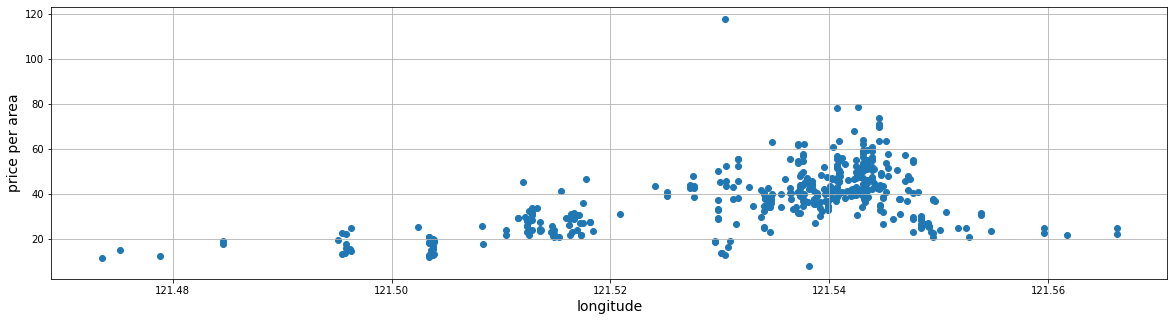

In [2]:
in_cols = [data[:, i] for i in range(len(header)-1)]
out_col = data[:, -1]

for col, hdr in zip(in_cols, header[:-1]):
    analyze.scatter(col, out_col, xlabel=hdr, ylabel=header[-1], figsize=(20, 5))

## Esercizio: Abitazioni a Taiwan

**Si calibri un modello mediate il metodo dei minimi quadrati**

Il modello deve essere nella forma:

$$
f(x_i) = \sum_{j = 0}^{n-1} \alpha_j x_{i,j}
$$

Dove:

* $j$ indica l'indice di una delle colonne di ingresso
* $i$ indica l'indice di un esempio (mostrato solo per chiarezza)

Intuitivamente, il modello è una sommma pesata dei valori degli ingressi

* Per la calibrazione si utilizzi `example.analyze.fit`
* Si stampino i valori dei coefficienti e del SSE

In [3]:
alpha, sse = analyze.fit(in_cols, out_col)

print(f'SSE: {sse:.3f}')
for h, v in zip(header, alpha):
    print(f'Coefficiente per "{h}": {v:.3f}')

SSE: 32840.519
Coefficiente per "house age": -0.269
Coefficiente per "dist to MRT": -0.005
Coefficiente per "#stores": 1.158
Coefficiente per "latitude": 227.111
Coefficiente per "longitude": -46.305


## Esercizio: Abitazioni a Taiwan

**Si osservi la qualità delle previsioni mediante un grafico di dispersione**

* Si riportino i valori misurati sull'asse delle ascisse
* ...Ed i valori stimati dal modello sull'asse delle ordinate

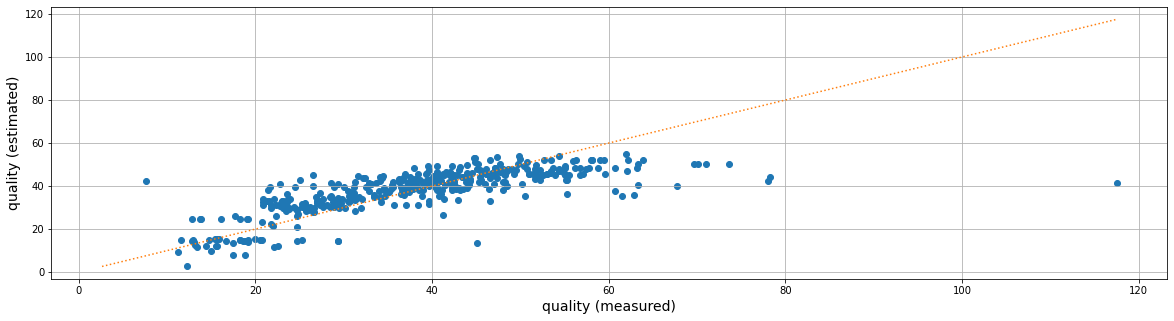

In [4]:
import numpy as np
yp = sum(col * v for col, v in zip(in_cols, alpha))

analyze.scatter(out_col, yp, xlabel='cost/ (measured)', ylabel='quality (estimated)', figsize=(20, 5), add_bisector=True)